In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 876.6/876.6 kB 6.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.8/54.8 MB 3.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.3/64.3 MB 3.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 3.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 4.0 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: sympy
    Found existing installation: sympy 1.12
    Uninstalling sympy-1.12:
      Successfully uninstalled sympy-1.12


In [2]:
# Import Essential Libraries
import os
import random
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO
from IPython.display import Video
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import pathlib
import glob
from tqdm.notebook import trange, tqdm
import warnings
warnings.filterwarnings('ignore')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/Users/mohammedtbahriti/Library/Application Support/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
# Configure the visual appearance of Seaborn plots
sns.set(rc={'axes.facecolor': '#eae8fa'}, style='darkgrid')

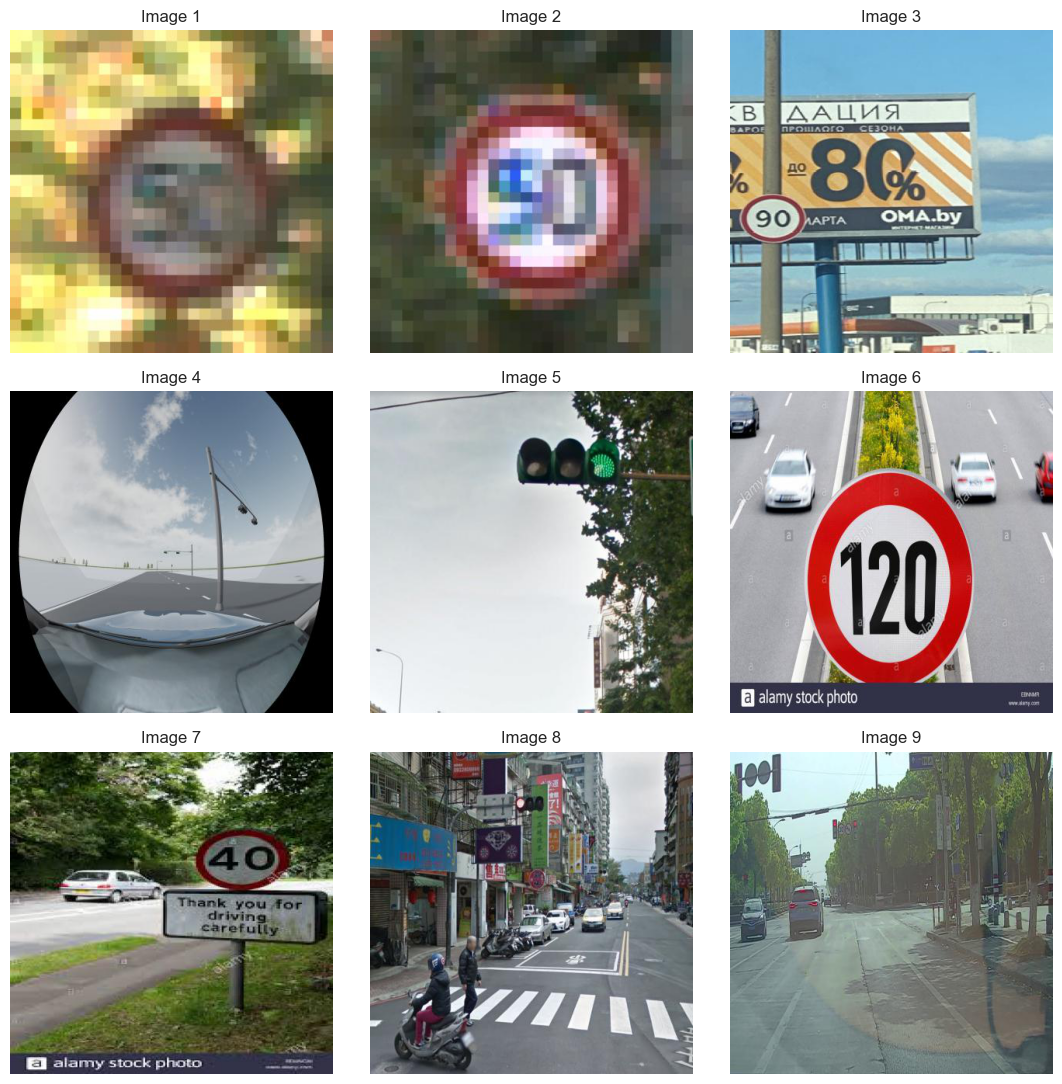

In [4]:
Image_dir = 'car/train/images'

num_samples = 9
image_files = os.listdir(Image_dir)

# Randomly select num_samples images
rand_images = random.sample(image_files, num_samples)

fig, axes = plt.subplots(3, 3, figsize=(11, 11))

for i in range(num_samples):
    image = rand_images[i]
    ax = axes[i // 3, i % 3]
    ax.imshow(plt.imread(os.path.join(Image_dir, image)))
    ax.set_title(f'Image {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [6]:
# Get the size of the image
image = cv2.imread("car/train/images/00000_00000_00012_png.rf.23f94508dba03ef2f8bd187da2ec9c26.jpg")
h, w, c = image.shape
print(f"The image has dimensions {w}x{h} and {c} channels.")

The image has dimensions 416x416 and 3 channels.



image 1/1 /Users/mohammedtbahriti/Documents/python/car/train/images/FisheyeCamera_1_00228_png.rf.e7c43ee9b922f7b2327b8a00ccf46a4c.jpg: 640x640 (no detections), 63.8ms
Speed: 1.7ms preprocess, 63.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


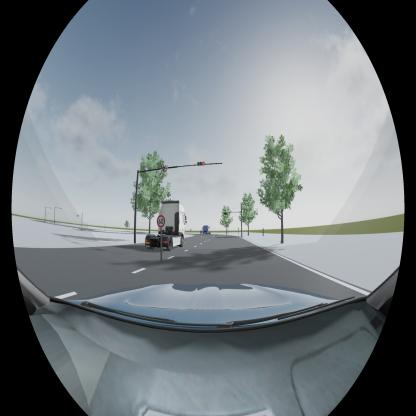

In [8]:
# Use a pretrained YOLOv8n model
model = YOLO("yolov8n.pt") 

# Use the model to detect object
image = "car/train/images/FisheyeCamera_1_00228_png.rf.e7c43ee9b922f7b2327b8a00ccf46a4c.jpg"
result_predict = model.predict(source = image, imgsz=(640))

# show results
plot = result_predict[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

In [9]:
!pip install --upgrade ultralytics ray

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 MB 3.6 MB/s eta 0:00:0000:0100:01


In [25]:
from ultralytics import YOLO

# Charger le modèle pré-entraîné à partir du chemin où il est sauvegardé
model = YOLO('/Users/mohammedtbahriti/Documents/TRAFIC_DETECTION/runs/detect/train/weights/best (1).pt')

# Utiliser le modèle pour faire des prédictions avec un chemin de sauvegarde personnalisé
results = model.predict(source="/Users/mohammedtbahriti/Documents/python/car/test/images/001826_JPG_jpg.rf.a805482f1c979ccfd35e378a2d5d78a6.jpg",
                        
                       
                        show=True)
# Vérifier si la touche 'q' est pressée pour quitter
while True:
 if cv2.waitKey(1) & 0xFF == ord('q'):
  break



image 1/1 /Users/mohammedtbahriti/Documents/python/car/test/images/001826_JPG_jpg.rf.a805482f1c979ccfd35e378a2d5d78a6.jpg: 416x416 1 Green Light, 1 Speed Limit 40, 25.2ms
Speed: 0.9ms preprocess, 25.2ms inference, 0.5ms postprocess per image at shape (1, 3, 416, 416)


In [26]:
import cv2
from ultralytics import YOLO

# Charger le modèle pré-entraîné
model = YOLO("/Users/mohammedtbahriti/Documents/TRAFIC_DETECTION/runs/detect/train/weights/best (1).pt")

# Ouvrir la caméra avec une résolution réduite
cap = cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 640)  # Largeur
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)  # Hauteur

while True:
    # Capturer une image de la caméra
    ret, frame = cap.read()
    
    if not ret:
        print("Erreur de capture de l'image")
        break

    # Utiliser le modèle pour faire des prédictions
    results = model.predict(source=frame, show=False, imgsz=320, stream=True)

    # Traiter et afficher les résultats
    for result in results:
        # Afficher les résultats dans une fenêtre
        cv2.imshow('YOLO Detection', result.plot())

    # Vérifier si la touche 'q' est pressée pour quitter
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Libérer la caméra et fermer les fenêtres
cap.release()
cv2.destroyAllWindows()



0: 256x320 (no detections), 21.0ms
Speed: 1.6ms preprocess, 21.0ms inference, 0.2ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 (no detections), 20.4ms
Speed: 1.0ms preprocess, 20.4ms inference, 0.2ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 (no detections), 15.2ms
Speed: 1.3ms preprocess, 15.2ms inference, 0.2ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 (no detections), 30.3ms
Speed: 11.5ms preprocess, 30.3ms inference, 0.2ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 (no detections), 16.3ms
Speed: 0.5ms preprocess, 16.3ms inference, 0.2ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 (no detections), 12.5ms
Speed: 0.7ms preprocess, 12.5ms inference, 0.2ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 (no detections), 11.5ms
Speed: 0.6ms preprocess, 11.5ms inference, 0.2ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 (no detections), 16.6ms
Speed: 0.6ms preprocess, 16.6ms 